In [1]:
%matplotlib notebook
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


def read_sqlite(file):
    conn = sqlite3.connect(file)
    try:
        df = pd.read_sql_query('SELECT * FROM result', conn)
    except:
        return None
    finally:
        conn.close()
    return df

In [8]:
vals = [0.1, 0.178, 0.31, 0.562, 1, 1.778, 3.162, 5.623, 10, 17.783, 31.622, 56.234, 100]
dfs = dict(map(lambda x: (x, read_sqlite('results/sqlite_tpch1_flip_stack_{0:g}_results.sqlite'.format(x))), vals))
dfs

{0.1:        iteration  hostname  result  exited  return_code  signaled  term_sig  \
 0              1  rocks204       2       0            0         1        11   
 1              4  rocks204       0       1            0         0         0   
 2              3  rocks204       0       1            0         0         0   
 3              2  rocks204       0       1            0         0         0   
 4              0  rocks204       0       1            0         0         0   
 5              5  rocks204       0       1            0         0         0   
 6              7  rocks204       0       1            0         0         0   
 7              6  rocks204       0       1            0         0         0   
 8              8  rocks204       0       1            0         0         0   
 9              9  rocks204       0       1            0         0         0   
 10            10  rocks204       0       1            0         0         0   
 11            12  rocks204       0

In [9]:
for val in vals:
    dfs[val]['rate'] = val

In [10]:
merged_df = pd.concat(list(dfs.values()))
merged_df

iteration  hostname  result  exited  return_code  signaled  term_sig  \
0              1  rocks204       2       0            0         1        11   
1              4  rocks204       0       1            0         0         0   
2              3  rocks204       0       1            0         0         0   
3              2  rocks204       0       1            0         0         0   
4              0  rocks204       0       1            0         0         0   
5              5  rocks204       0       1            0         0         0   
6              7  rocks204       0       1            0         0         0   
7              6  rocks204       0       1            0         0         0   
8              8  rocks204       0       1            0         0         0   
9              9  rocks204       0       1            0         0         0   
10            10  rocks204       0       1            0         0         0   
11            12  rocks204       0       1            0         0         0   
12            13  rocks204       0       1            0         0         0   
13            14  rocks204       0       1            0         0         0   
14            11  rocks204       0       1            0         0         0   
15            15  rocks204       0       1            0         0         0   
16            16  rocks204       0       1            0         0         0   
17            18  rocks204       0       1            0         0         0   
18            17  rocks204       0       1            0         0         0   
19            19  rocks204       0       1            0         0         0   
20            20  rocks204       0       1            0         0         0   
21            25  rocks204       0       1            0         0         0   
22            22  rocks204       0       1            0         0         0   
23            21  rocks204       0       1            0         0         0   
24            23  rocks204       0       1            0         0         0   
25            24  rocks204       0       1            0         0         0   
26            26  rocks204       0       1            0         0         0   
27            27  rocks204       0       1            0         0         0   
28            31  rocks204       0       1            0         0         0   
29            28  rocks204       0       1            0         0         0   
...          ...       ...     ...     ...          ...       ...       ...   
97470       7470  rocks216       2       0            0         1        11   
97471       7471  rocks216       0       1            0         0         0   
97472       7472  rocks216       1       1            0         0         0   
97473       7473  rocks216       2       0            0         1        11   
97474       7477  rocks216       2       0            0         1        11   
97475       7476  rocks216       2       0            0         1        11   
97476       7475  rocks216       2       0            0         1        11   
97477       7474  rocks216       0       1            0         0         0   
97478       7479  rocks216       2       0            0         1        11   
97479       7478  rocks216       0       1            0         0         0   
97480       7481  rocks216       2       0            0         1        11   
97481       7482  rocks216       2       0            0         1        11   
97482       7480  rocks216       1       1            0         0         0   
97483       7484  rocks216       2       0            0         1        11   
97484       7483  rocks216       0       1            0         0         0   
97485       7487  rocks216       2       0            0         1        11   
97486       7488  rocks216       2       0            0         1        11   
97487       7485  rocks216       0       1            0         0         0   
97488       7489  rocks216       2       0            0  

In [11]:
df = merged_df.groupby(['result', 'rate']).size().reset_index(name='counts')
df

result     rate  counts
0        0    0.100   96928
1        0    0.178   96944
2        0    0.310   96927
3        0    0.562   96935
4        0    1.000   96627
5        0    1.778   96111
6        0    3.162   95199
7        0    5.623   93802
8        0   10.000   91279
9        0   17.783   87862
10       0   31.622   81998
11       0   56.234   75472
12       0  100.000   48895
13       1    0.100      15
14       1    0.178      19
15       1    0.310      18
16       1    0.562      18
17       1    1.000      26
18       1    1.778      46
19       1    3.162      83
20       1    5.623     150
21       1   10.000     286
22       1   17.783     450
23       1   31.622     672
24       1   56.234     893
25       1  100.000    1610
26       2    0.100     543
27       2    0.178     523
28       2    0.310     547
29       2    0.562     533
..     ...      ...     ...
34       2   10.000    5771
35       2   17.783    8949
36       2   31.622   14440
37       2   56.234   20542
38       2  100.000   45919
39       3    0.100      13
40       3    0.178      13
41       3    0.310       7
42       3    0.562      11
43       3    1.000      24
44       3    1.778      21
45       3    3.162      68
46       3    5.623      83
47       3   10.000     157
48       3   17.783     229
49       3   31.622     390
50       3   56.234     564
51       3  100.000    1027
52       4    0.100       1
53       4    0.178       1
54       4    0.310       1
55       4    0.562       3
56       4    1.000       5
57       4    1.778       3
58       4    3.162       2
59       4    5.623      11
60       4   10.000       7
61       4   17.783      10
62       4   56.234      29
63       4  100.000      49

[64 rows x 3 columns]

In [12]:
for result in range(5):
    for rate in vals:
        if len(df[(df['result'] == result) & (df['rate'] == rate)]) == 0:
            df = df.append({
                'result': result,
                'rate': rate,
                'counts': 0
            }, ignore_index=True)

df['result'] = df['result'].astype(int)
df['counts'] = df['counts'].astype(int)
df.sort_values(['result', 'rate'], inplace=True)
df

result     rate  counts
0        0    0.100   96928
1        0    0.178   96944
2        0    0.310   96927
3        0    0.562   96935
4        0    1.000   96627
5        0    1.778   96111
6        0    3.162   95199
7        0    5.623   93802
8        0   10.000   91279
9        0   17.783   87862
10       0   31.622   81998
11       0   56.234   75472
12       0  100.000   48895
13       1    0.100      15
14       1    0.178      19
15       1    0.310      18
16       1    0.562      18
17       1    1.000      26
18       1    1.778      46
19       1    3.162      83
20       1    5.623     150
21       1   10.000     286
22       1   17.783     450
23       1   31.622     672
24       1   56.234     893
25       1  100.000    1610
26       2    0.100     543
27       2    0.178     523
28       2    0.310     547
29       2    0.562     533
..     ...      ...     ...
35       2   17.783    8949
36       2   31.622   14440
37       2   56.234   20542
38       2  100.000   45919
39       3    0.100      13
40       3    0.178      13
41       3    0.310       7
42       3    0.562      11
43       3    1.000      24
44       3    1.778      21
45       3    3.162      68
46       3    5.623      83
47       3   10.000     157
48       3   17.783     229
49       3   31.622     390
50       3   56.234     564
51       3  100.000    1027
52       4    0.100       1
53       4    0.178       1
54       4    0.310       1
55       4    0.562       3
56       4    1.000       5
57       4    1.778       3
58       4    3.162       2
59       4    5.623      11
60       4   10.000       7
61       4   17.783      10
64       4   31.622       0
62       4   56.234      29
63       4  100.000      49

[65 rows x 3 columns]

In [13]:
pivoted = pd.pivot_table(df, values='counts', index='rate', columns='result')
pivoted.columns = ['ok', 'incorrect', 'crash', 'abnormal', 'timeout']
pivoted

ok  incorrect  crash  abnormal  timeout
rate                                               
0.100    96928         15    543        13        1
0.178    96944         19    523        13        1
0.310    96927         18    547         7        1
0.562    96935         18    533        11        3
1.000    96627         26    818        24        5
1.778    96111         46   1319        21        3
3.162    95199         83   2148        68        2
5.623    93802        150   3454        83       11
10.000   91279        286   5771       157        7
17.783   87862        450   8949       229       10
31.622   81998        672  14440       390        0
56.234   75472        893  20542       564       29
100.000  48895       1610  45919      1027       49

<IPython.core.display.Javascript object>


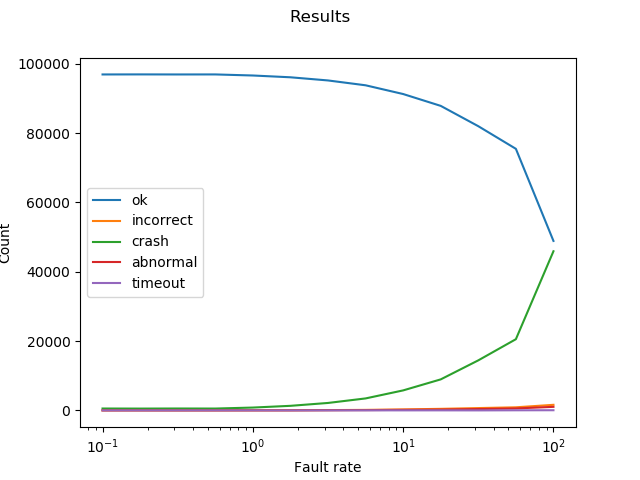

In [14]:
fig = plt.figure()
fig.suptitle('Results')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.plot(vals, pivoted['ok'], label='ok')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['crash'], label='crash')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


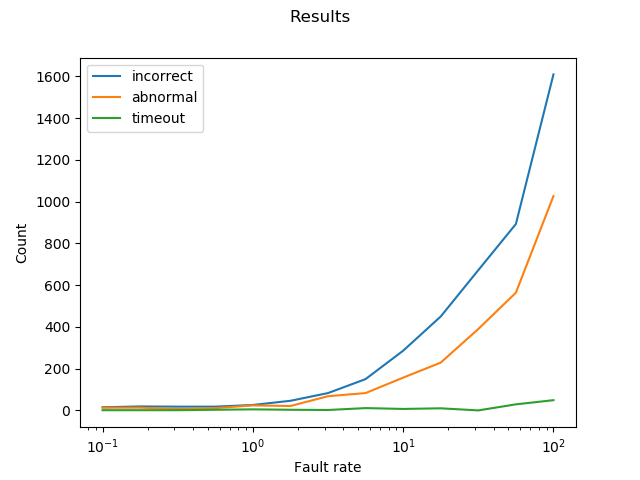

In [15]:
fig = plt.figure()
fig.suptitle('Results')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


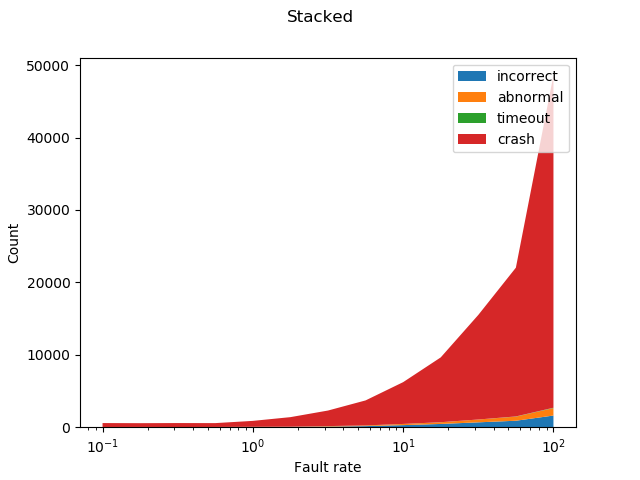

In [17]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(vals,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              pivoted['crash'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout', 'crash'])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


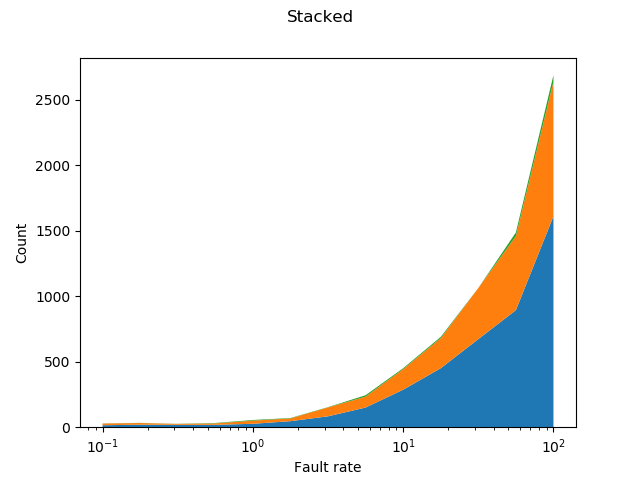

In [18]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(vals,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout'])
plt.show()

<IPython.core.display.Javascript object>


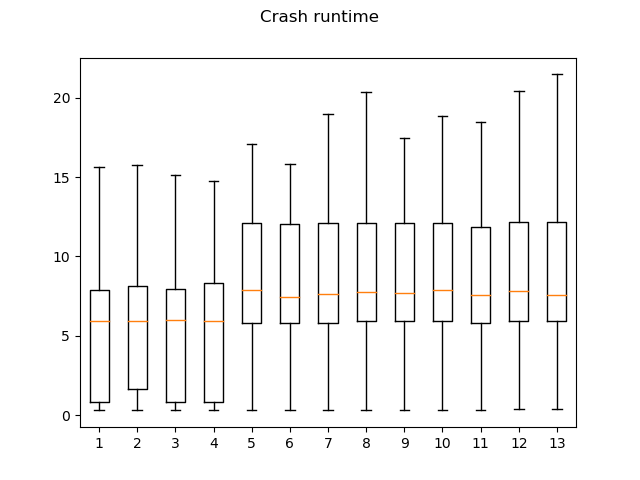

In [19]:
fig = plt.figure()

fig.suptitle('Crash runtime')

df_2 = merged_df[merged_df['result'] == 2]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


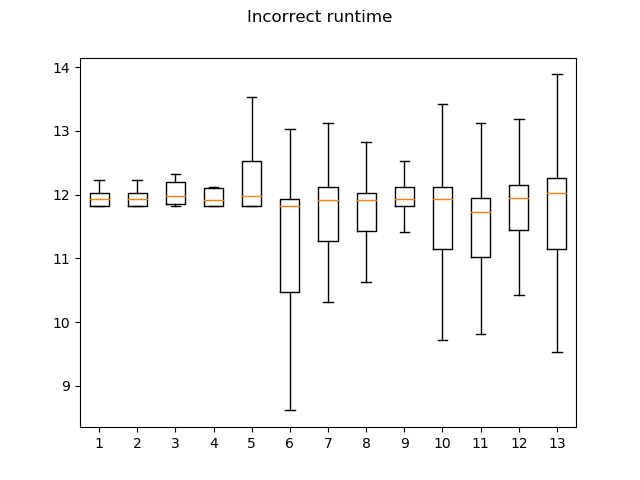

In [20]:
fig = plt.figure()

fig.suptitle('Incorrect runtime')

df_2 = merged_df[merged_df['result'] == 1]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


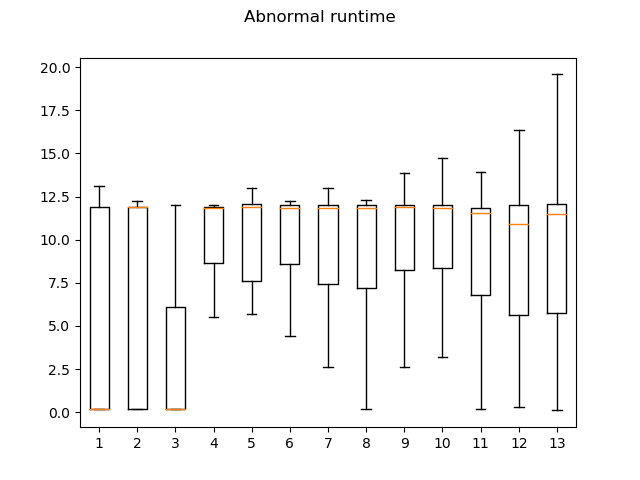

In [21]:
fig = plt.figure()

fig.suptitle('Abnormal runtime')

df_2 = merged_df[merged_df['result'] == 3]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


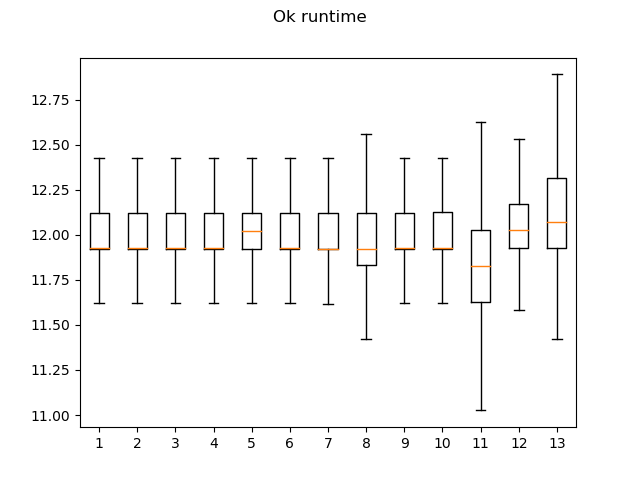

In [22]:
fig = plt.figure()

fig.suptitle('Ok runtime')

df_2 = merged_df[merged_df['result'] == 0]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

In [23]:
crashes = merged_df[merged_df['result'] == 2]
signals = crashes['term_sig'].unique()
crash_count = crashes.groupby(['term_sig', 'rate']).size().reset_index(name='counts')
crash_pivoted = pd.pivot_table(crash_count, values='counts', index='rate', columns='term_sig')
crash_pivoted


term_sig     4    5      6       7    8        11
rate                                             
0.100       2.0  NaN    3.0    14.0  NaN    524.0
0.178       3.0  NaN    6.0    17.0  NaN    497.0
0.310       1.0  NaN    1.0    18.0  NaN    527.0
0.562       5.0  NaN    5.0    16.0  NaN    507.0
1.000       4.0  NaN   21.0    41.0  NaN    752.0
1.778       6.0  NaN   22.0    56.0  NaN   1235.0
3.162      19.0  NaN   34.0    89.0  NaN   2006.0
5.623      28.0  NaN   65.0   137.0  NaN   3224.0
10.000     39.0  1.0   88.0   247.0  NaN   5396.0
17.783     62.0  NaN  133.0   388.0  NaN   8366.0
31.622    108.0  NaN  226.0   572.0  NaN  13534.0
56.234    152.0  NaN  299.0   827.0  1.0  19263.0
100.000   322.0  1.0  548.0  1791.0  2.0  43255.0

<IPython.core.display.Javascript object>


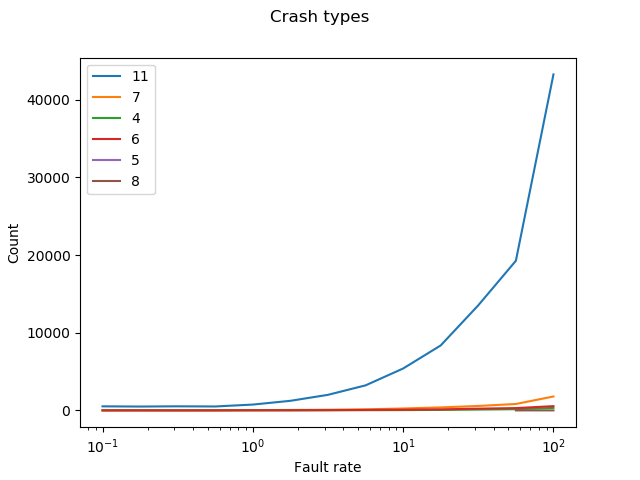

In [24]:
fig = plt.figure()
fig.suptitle('Crash types')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')

for signal in signals:
    plt.plot(vals, crash_pivoted[signal], label=str(signal))
    
plt.legend()
plt.show()